In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import os

In [2]:
df=pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
df.set_index('Country','Date_reported', inplace=True)

In [3]:
Rwanda=df.loc[['Rwanda']][72:] #Datasets from day 1 when covid come to Rwanda

In [4]:
l=list(Rwanda['Date_reported'])
new=[]
for s in l:
    li=s[0:4]+s[5:7]+s[8:]
    new.append(int(li))
Rwanda['Date_reported']=new

In [5]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [17]:
y=Rwanda['New_deaths'].values.reshape(-1, 1) 
x=Rwanda['New_cases'].values.reshape(-1, 1) 
X_train, X_test,Y_train, Y_test=train_test_split(x, y, test_size=0.2, random_state=32)

covid = LinearRegression()
covid.fit(X_train,Y_train)
alpha = covid.coef_
beta = covid.intercept_
print('alpha = ', alpha[0])
print('beta = ', beta)

alpha =  [0.00747273]
beta =  [0.49706216]


In [54]:
#Test the model


# Make predictions using the testing set
Y_pred = covid.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))


R-squared: 0.50
mean absolute error: 1.13
Mean squared error: 3.52


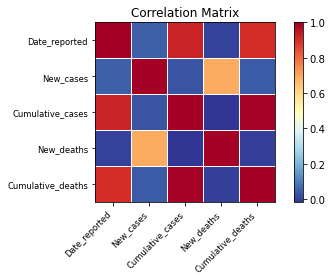

In [83]:
corr = Rwanda.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()


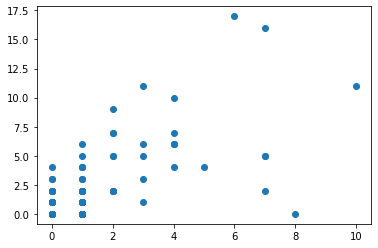

In [80]:
plt.scatter(np.floor(Y_pred),Y_test)

plt.show()

In [82]:
df=pd.DataFrame(data=np.hstack([np.floor(Y_pred),Y_test]), columns=['Y_pred','Y_test'])
df

,Y_pred,Y_test
0,7.0,2.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
188,0.0,0.0
189,3.0,11.0
190,1.0,2.0
191,0.0,0.0


,Y_pred,Y_test
0,7.0,2.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
188,0.0,0.0
189,3.0,11.0
190,1.0,2.0
191,0.0,0.0
